# AE 598RL Homework 4

In [1]:
import gym
import gym_gridworld
import numpy as np
import matplotlib.pyplot as plt
from tablemethodsrl import Sarsa
from tablemethodsrl import QLearning
from tablemethodsrl import Reinforce
%matplotlib inline

Create environments and agents.

In [2]:
ezpz = gym.make('GridWorld-v0')
hard = gym.make('GridWorldHard-v0')

In [3]:
# parameters
reinforce_episodes_num = [5000, 5000, 2500, 1000, 1000]
episode_length = 100
batch_size = [100, 50, 100, 100, 50]
reinforce_learning_rate = [.01, .001, .01, .01, .001]
reward_decay = 1
eps = .1

In [4]:
# ez reinforce agents
reinforce_ez1 = Reinforce(ezpz, reinforce_learning_rate[0], reward_decay, eps)
reinforce_ez2 = Reinforce(ezpz, reinforce_learning_rate[1], reward_decay, eps)
reinforce_ez3 = Reinforce(ezpz, reinforce_learning_rate[2], reward_decay, eps)
reinforce_ez4 = Reinforce(ezpz, reinforce_learning_rate[3], reward_decay, eps)
reinforce_ez5 = Reinforce(ezpz, reinforce_learning_rate[4], reward_decay, eps)

# hard reinforce agents
reinforce_hd1 = Reinforce(hard, reinforce_learning_rate[0], reward_decay, eps)
reinforce_hd2 = Reinforce(hard, reinforce_learning_rate[1], reward_decay, eps)
reinforce_hd3 = Reinforce(hard, reinforce_learning_rate[2], reward_decay, eps)
reinforce_hd4 = Reinforce(hard, reinforce_learning_rate[3], reward_decay, eps)
reinforce_hd5 = Reinforce(hard, reinforce_learning_rate[4], reward_decay, eps)

## Easy GridWorld 

Train the agents

In [5]:
eps1, rewards1, policy1 = reinforce_ez1.train(reinforce_episodes_num[0], batch_size[0], episode_length)
eps2, rewards2, policy2 = reinforce_ez2.train(reinforce_episodes_num[1], batch_size[1], episode_length)
eps3, rewards3, policy3 = reinforce_ez3.train(reinforce_episodes_num[2], batch_size[2], episode_length)
eps4, rewards4, policy4 = reinforce_ez4.train(reinforce_episodes_num[3], batch_size[3], episode_length)
eps5, rewards5, policy5 = reinforce_ez5.train(reinforce_episodes_num[4], batch_size[4], episode_length)

Plot the results

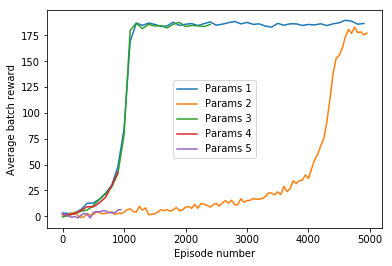

In [6]:
plt.plot(eps1, rewards1, label='Params 1')
plt.plot(eps2, rewards2, label='Params 2')
plt.plot(eps3, rewards3, label='Params 3')
plt.plot(eps4, rewards4, label='Params 4')
plt.plot(eps5, rewards5, label='Params 5')
plt.xlabel('Episode number')
plt.ylabel('Average batch reward')
plt.legend()
plt.show()

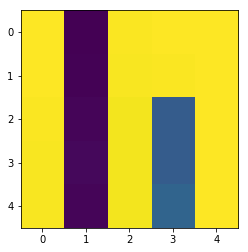

In [7]:
plt.imshow(policy1.sum(-1).reshape((5,5)))

We'll use the parameters in 1 to train SARSA and Q-learning agents for comparison.

In [8]:
episodes_num = 5000
learning_rate = .01

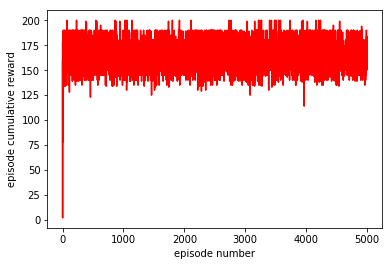

In [11]:
# SARSA
sarsa = Sarsa(ezpz, learning_rate, reward_decay, eps)
sarsa_cum_rewards = sarsa.train(episodes_num, episode_length, viz=False)

plt.plot(range(episodes_num), sarsa_cum_rewards, 'r')
plt.ylabel('episode cumulative reward')
plt.xlabel('episode number')
plt.show()

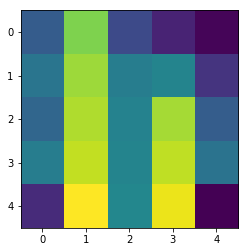

In [12]:
plt.imshow(sarsa.q_table.sum(-1).reshape((5,5)))

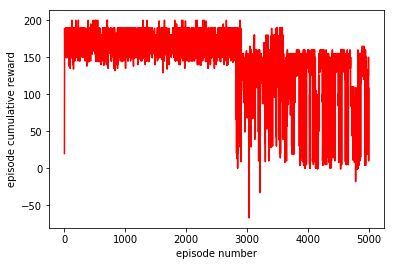

In [13]:
# Q Learning
qlearn = QLearning(ezpz, learning_rate, reward_decay, eps)
ql_cum_rewards = qlearn.train(episodes_num, episode_length, viz=False)

plt.plot(range(episodes_num), ql_cum_rewards, 'r')
plt.ylabel('episode cumulative reward')
plt.xlabel('episode number')
plt.show()

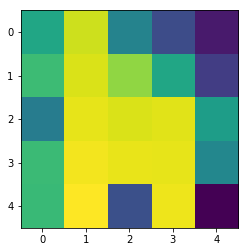

In [14]:
plt.imshow(qlearn.q_table.sum(-1).reshape((5,5)))

Compare the three tabular methods' performance on easy GridWorld

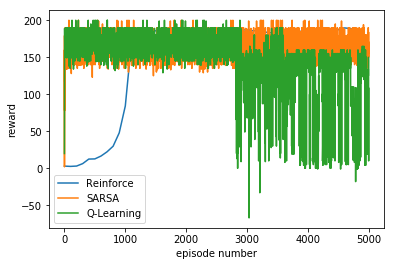

In [15]:
plt.plot(eps1, rewards1, label='Reinforce')
plt.plot(range(episodes_num), sarsa_cum_rewards, label='SARSA')
plt.plot(range(episodes_num), ql_cum_rewards, label='Q-Learning')
plt.ylabel('reward')
plt.xlabel('episode number')
plt.legend()
plt.show()

Since it's hard to see Reinforce data, I need to implements average rewards for SARSA and Q-Learning as well. This will also be a fairer comparison.

## Hard GridWorld

Train the agents

In [16]:
eps1_hd, rewards1_hd, policy1_hd = reinforce_hd1.train(reinforce_episodes_num[0], batch_size[0], episode_length)
eps2_hd, rewards2_hd, policy2_hd = reinforce_hd2.train(reinforce_episodes_num[1], batch_size[1], episode_length)
eps3_hd, rewards3_hd, policy3_hd = reinforce_hd3.train(reinforce_episodes_num[2], batch_size[2], episode_length)
eps4_hd, rewards4_hd, policy4_hd = reinforce_hd4.train(reinforce_episodes_num[3], batch_size[3], episode_length)
eps5_hd, rewards5_hd, policy5_hd = reinforce_hd5.train(reinforce_episodes_num[4], batch_size[4], episode_length)

Plot the results

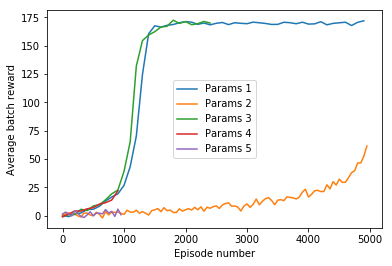

In [17]:
plt.plot(eps1_hd, rewards1_hd, label='Params 1')
plt.plot(eps2_hd, rewards2_hd, label='Params 2')
plt.plot(eps3_hd, rewards3_hd, label='Params 3')
plt.plot(eps4_hd, rewards4_hd, label='Params 4')
plt.plot(eps5_hd, rewards5_hd, label='Params 5')
plt.xlabel('Episode number')
plt.ylabel('Average batch reward')
plt.legend()
plt.show()

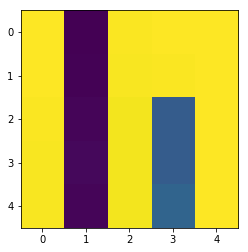

In [18]:
plt.imshow(policy1.sum(-1).reshape((5,5)))

Reinforce is clearly finding and getting stuck in the B loop here.

We'll use the parameters in 1 to train SARSA and Q-learning agents for comparison.

In [19]:
episodes_num_hd = 5000
learning_rate_hd = .01

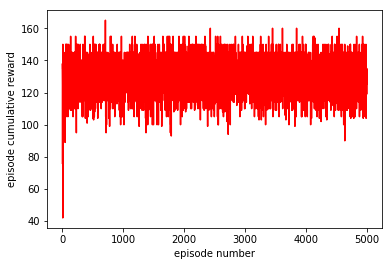

In [20]:
# SARSA
sarsa_hd = Sarsa(hard, learning_rate_hd, reward_decay, eps)
sarsa_cum_rewards_hd = sarsa_hd.train(episodes_num_hd, episode_length, viz=False)

plt.plot(range(episodes_num), sarsa_cum_rewards_hd, 'r')
plt.ylabel('episode cumulative reward')
plt.xlabel('episode number')
plt.show()

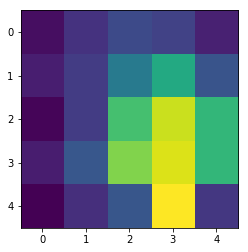

In [21]:
plt.imshow(sarsa_hd.q_table.sum(-1).reshape((5,5)))

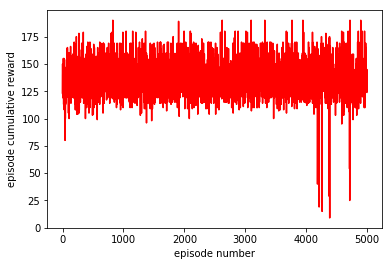

In [22]:
# Q Learning
qlearn_hd = QLearning(hard, learning_rate_hd, reward_decay, eps)
ql_cum_rewards_hd = qlearn_hd.train(episodes_num_hd, episode_length, viz=False)

plt.plot(range(episodes_num), ql_cum_rewards_hd, 'r')
plt.ylabel('episode cumulative reward')
plt.xlabel('episode number')
plt.show()

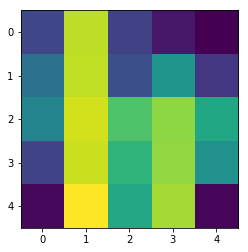

In [23]:
plt.imshow(qlearn_hd.q_table.sum(-1).reshape((5,5)))

Compare the three tabular methods' performance on hard GridWorld

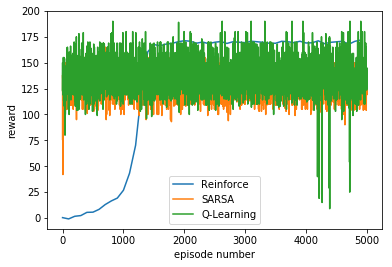

In [24]:
plt.plot(eps1_hd, rewards1_hd, label='Reinforce')
plt.plot(range(episodes_num), sarsa_cum_rewards_hd, label='SARSA')
plt.plot(range(episodes_num), ql_cum_rewards_hd, label='Q-Learning')
plt.ylabel('reward')
plt.xlabel('episode number')
plt.legend()
plt.show()

Neither SARSA nor Q-Learning find the B loop consistently. For Hard GridWorld with these hyperparameters Reinforce out performs.